In [1]:
import torch
import pandas as pd

In [2]:
# load the model pth
model = torch.jit.load('model/model.pth', map_location=torch.device('cpu'))
model.eval()

RecursiveScriptModule(
  original_name=ResNet
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
  (layer1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=block
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (conv2): RecursiveScriptModule(original_name=Conv2d)
      (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
      (conv3): RecursiveScriptModule(original_name=Conv2d)
      (bn3): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (identity_downsample): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_na

(10000, 785)
(784,)
(28, 28)
torch.Size([1, 1, 28, 28])


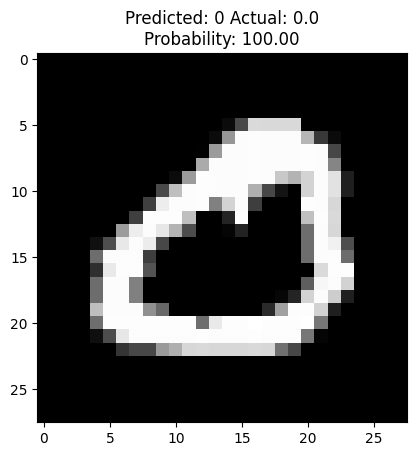

In [7]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

# load the image
# load the test data
test_data = pd.read_csv('Data/t10k.csv')
print(test_data.shape)
test_data = test_data.values

# get random image from the test data
random_idx = np.random.randint(0, test_data.shape[0])
img = test_data[random_idx, 1:]
print(img.shape)
label = test_data[random_idx, 0]

# reshape the image
img = img.reshape(28, 28)
print(img.shape)

pred = model(torch.from_numpy(img).float().unsqueeze(0).unsqueeze(0))
print(torch.from_numpy(img).float().unsqueeze(0).unsqueeze(0).shape)
pred = pred.argmax().item()

# calculate probability
prob = torch.nn.functional.softmax(model(torch.from_numpy(img).float().unsqueeze(0).unsqueeze(0)), dim=1)
prob = prob.max().item()

plt.imshow(img, cmap='gray')
plt.title('Predicted: {} Actual: {}\nProbability: {:.2f}'.format(pred, label, int(prob*100)))
plt.show()